# @Shubham Kumar Singh

## Digital enterprise, Advisian

### Consits 2 models for binary classification b/w class0 and class1
#### Model 1: 2 layered
#### Model 2: 5 layered


In [6]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_backbone import *
import glob

import matplotlib.image as mpimg


# don't touch_ sets parameters for plots_______________________________
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2
# _____________________________________________________________________

np.random.seed(1)

In [7]:
#Loading my data
#train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
# Example of a picture
# Explore your dataset 
#m_train = train_x_orig.shape[0]
#num_px = train_x_orig.shape[1]
#m_test = test_x_orig.shape[0]

#print ("Number of training examples: " + str(m_train))
#print ("Number of testing examples: " + str(m_test))
#print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
#print ("train_x_orig shape: " + str(train_x_orig.shape))
#print ("train_y shape: " + str(train_y.shape))
#print ("test_x_orig shape: " + str(test_x_orig.shape))
#print ("test_y shape: " + str(test_y.shape))
# Reshape the training and test examples 
#train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
#test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
#train_x = train_x_flatten/255.
#test_x = test_x_flatten/255.

#print ("train_x's shape: " + str(train_x.shape))
#print ("test_x's shape: " + str(test_x.shape))

In [8]:
#loading dataset for TRAINING________________________________________________________

file_pizza=glob.glob('class0/*.jpg')
file_sunflower=glob.glob('class1/*.jpg')
x_train=[]
y_train=[]

#pizza
for file in file_pizza:
    img=np.array(mpimg.imread(file))
    #print(img.shape)
       
    img_flatten = img.reshape(12288,1) 
    #print(img_flatten.shape)
    standard_img=img_flatten / 255.
    x_train.append(standard_img)
    #print(standard_img)
    y_train.append(0)

    

#sunflower
for file in file_sunflower:
    img=np.array(mpimg.imread(file))
    #print(img.shape)
       
    img_flatten = img.reshape(12288,1) 
    #print(img_flatten.shape)
    standard_img=img_flatten / 255.
    x_train.append(standard_img)
    #print(standard_img)
    y_train.append(1)
      
x_train=np.array(x_train)
y_train=np.array(y_train)

x_train=np.squeeze(x_train)
train_x=x_train.T
train_y=y_train.reshape(1,82)

print("Training: Shape of Input matrix  :",train_x.shape)
print("Training: Shape of Output matrix :",train_y.shape)

#loading dataset for TEST
file_pizza_test=glob.glob('class0_test/*.jpg')
file_sunflower_test=glob.glob('class1_test/*.jpg')
x_test=[]
y_test=[]

#pizza
for file in file_pizza_test:
    img_test=np.array(mpimg.imread(file))
    #print(img.shape)
       
    img_flatten_test = img_test.reshape(12288,1) 
    #print(img_flatten.shape)
    standard_img_test=img_flatten_test / 255.
    x_test.append(standard_img_test)
    #print(standard_img)
    y_test.append(0)
    

#sunflower
for file in file_sunflower_test:
    img_test=np.array(mpimg.imread(file))
    #print(img.shape)
       
    img_flatten_test = img_test.reshape(12288,1) 
    #print(img_flatten.shape)
    standard_img_test=img_flatten_test / 255.
    x_test.append(standard_img_test)
    #print(standard_img)
    y_test.append(1)
      
x_test=np.array(x_test)
y_test=np.array(y_test)

x_test=np.squeeze(x_test)
test_x=x_test.T
test_y=y_test.reshape(1,24)

print("Training: Shape of Input matrix  :",test_x.shape)
print("Training: Shape of Output matrix :",test_y.shape)
print(y_test)





Training: Shape of Input matrix  : (12288, 82)
Training: Shape of Output matrix : (1, 82)
Training: Shape of Input matrix  : (12288, 24)
Training: Shape of Output matrix : (1, 24)
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [9]:
#input single test

#loading dataset for TEST
single_test="image_0001.jpg"
single_x=[]
single_y=[]

single_img=np.array(mpimg.imread(single_test))
       
single_img_flatten  = single_img.reshape(12288,1) 
print(single_img_flatten.shape)
single_standard_img = single_img_flatten/ 255.
single_x.append(single_standard_img)
#print(single_standard_img)
single_y.append(1) #input the class mannualy here


single_x=np.array(single_x)
single_y=np.array(single_y)
print(single_y)

single_x=np.squeeze(single_x)
single_x=(single_x.T).reshape(12288,1)
single_y=single_y.reshape(1,1)

print("Training: Shape of Input matrix  :",single_x.shape)
print("Training: Shape of Output matrix :",single_y.shape)
print(single_y)


(12288, 1)
[1]
Training: Shape of Input matrix  : (12288, 1)
Training: Shape of Output matrix : (1, 1)
[[1]]


In [10]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [12]:
# GRADED FUNCTION: two_layer_model

"""
    LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X              = input data, of shape (n_x, number of examples)
    Y              = true "label" vector (containing 0 if class0, 1 if class1),[1, number of examples]
    layers_dims    = dimensions of the layers (n_x, n_h, n_y)
    num_iterations = number of iterations of the optimization loop
    learning_rate  = learning rate of the gradient descent update rule
    print_cost     = If set to True, this will print the cost every 100 iterations 
    Returns        = parameters :a dictionary containing W1, W2, b1, and b2
"""

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop for gradient descent

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation.Inputs="dA2, cache2, cache1".Outputs:"dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation='relu')
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print cost every 100 iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6933180224300244
Cost after iteration 100: 0.49585826626736157
Cost after iteration 200: 0.08355143894106362
Cost after iteration 300: 0.03381357521676777
Cost after iteration 400: 0.01940931247961935
Cost after iteration 500: 0.013100538928063196
Cost after iteration 600: 0.009682764530078469
Cost after iteration 700: 0.007579503510803244
Cost after iteration 800: 0.006171195024260272
Cost after iteration 900: 0.005170535499654639
Cost after iteration 1000: 0.004427400497740569
Cost after iteration 1100: 0.0038562901522231105
Cost after iteration 1200: 0.003405221719629366
Cost after iteration 1300: 0.0030410082782722143
Cost after iteration 1400: 0.0027415015428399175
Cost after iteration 1500: 0.0024913559714152063
Cost after iteration 1600: 0.0022796562310664374
Cost after iteration 1700: 0.002098436839697107
Cost after iteration 1800: 0.0019417538551525703
Cost after iteration 1900: 0.0018050903168948043
Cost after iteration 2000: 0.0016849548981037537
Co

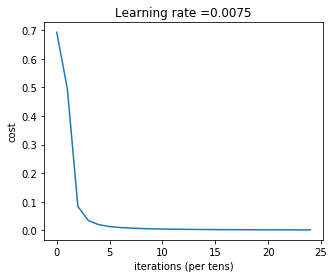

In [13]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [ ]:
predictions_train = predict(train_x, train_y, parameters)

In [ ]:
predictions_test = predict(test_x, test_y, parameters)

In [ ]:
# CONSTANTS: dimensios of the layer________________

layers_dims = [12288, 20, 7, 5, 1] #  5-layer model

In [ ]:
# GRADED FUNCTION: L_layer_model

    #[LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    """
    Arguments:
    X = data, numpy array of shape [number of examples, num_px * num_px * 3]
    Y = true "label" vector (containing 0 if class0, 1 if class1), [1, number of examples]
    layers_dims    = list containing the input size and each layer size, of length number of layers + 1
    learning_rate  = learning rate of the gradient descent update rule
    num_iterations = number of iterations of the optimization loop
    print_cost     = if True, it prints the cost every 100 steps
    
    Returns:
    parameters     = parameters learnt by the model. They can then be used to predict.
    """

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    

    np.random.seed(1)
    costs = []                         
    
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost
        cost = compute_cost(AL, Y)
        
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [ ]:
pred_train = predict(train_x, train_y, parameters)

In [ ]:
pred_test = predict(test_x, test_y, parameters)

In [ ]:
single_pred_test = predict(single_x, single_y, parameters)

plt.imshow(np.array(ndimage.imread(single_test, flatten=False)))